![Image of site-logo](https://www.kaggle.com/static/images/site-logo.png)
## Titanic: Machine Learning from Disaster
### Predict survival on the Titanic and get familiar with ML basics

Project Goal: Use machine learning to build a predictive model that predicts which passengers survived the Titanic shipwreck

Question: What sorts of people were more likety to survive the Titanic sinking

Dataset: 
- Training set [train_raw]: 891
- Testing set [test_raw]: 418

Variables:
- Predictor variables: PassengerId, Pclass(1/2/3 social-economic status), Name, Sex, Age, SibSp(# siblings or spouses aboard), Parch(# parents or children aboard), Ticket, Fare, Cabin, Embarked(port of Embarkation)
- Target variable: Survived (whether survived or not)
    Yes = 1, No = 0

Methodology:


Feature Engineering

### Import Libraries & Datasets

In [1]:
# Data Analysis and Wrangling
import pandas as pd # data processing
import numpy as np # linear algebra
import random # generate pseudo-random numbers

# Mathematical Functions
import math

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install matplotlib==3.1.0

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import Data
raw = pd.read_csv('/Users/hahatrisha/Downloads/train.csv')
validation = pd.read_csv('/Users/hahatrisha/Downloads/test.csv')

In [4]:
print("Shape of the raw dataset:", raw.shape)
raw.head(3)

Shape of the raw dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
print("Shape of the validation dataset:", validation.shape)
validation.head(3)

Shape of the validation dataset: (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [6]:
# Features in the Dataset
raw.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### Understanding the Datasets
- raw (891): dataset to explore the patterns of survival
- validation (418): dataset to predict whether the passengers on board survived

In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
raw.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
raw.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Text(0.5, 1.0, 'Embarkation Distribution')

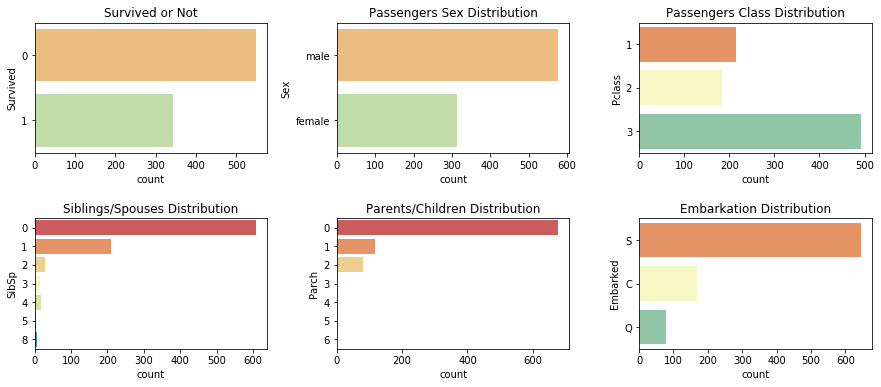

In [11]:
# Distribution of categorical variables: Sex, Pclass, Embarked, SibSp, Parch
fig, ax = plt.subplots(2,3, figsize=(15,6))
fig.subplots_adjust(wspace=0.3, hspace=0.5)
sns.countplot(y=raw['Survived'], ax=ax[0,0], palette='Spectral').set_title('Survived or Not')
sns.countplot(y=raw['Sex'], ax=ax[0,1], palette='Spectral').set_title('Passengers Sex Distribution')
sns.countplot(y=raw['Pclass'], ax=ax[0,2], palette='Spectral').set_title('Passengers Class Distribution')
sns.countplot(y=raw['SibSp'], ax=ax[1,0], palette='Spectral').set_title('Siblings/Spouses Distribution')
sns.countplot(y=raw['Parch'], ax=ax[1,1], palette='Spectral').set_title('Parents/Children Distribution')
sns.countplot(y=raw['Embarked'], ax=ax[1,2], palette='Spectral').set_title('Embarkation Distribution')

Text(0.5, 1.0, 'Passenger Fare Distribution')

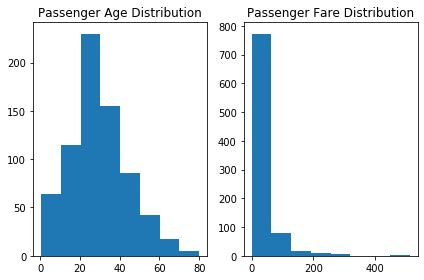

In [12]:
# Distribution of continous variables: Fare, Age
fig, ax = plt.subplots(1, 2, tight_layout=True, figsize=(6,4))
ax[0].hist(raw['Age'], bins=8)
ax[1].hist(raw['Fare'], bins=8)
title0 = 'Passenger Age Distribution'
title1 = 'Passenger Fare Distribution'
ax[0].set_title(title0)
ax[1].set_title(title1)

In [13]:
# Examine the correlation between factors
corr_matrix = raw.corr()

Text(0.5, 1, 'Titanic Variables Correlation Matrix')

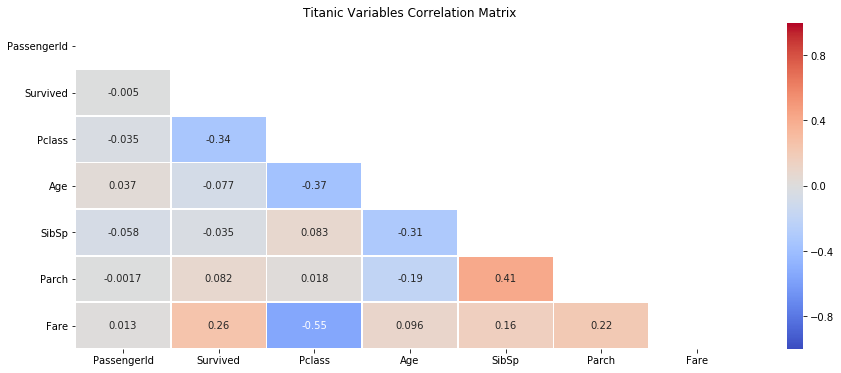

In [14]:
# Plot annotated heatmap for correlation matrix
mask = np.triu(corr_matrix)
fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(corr_matrix, annot=True, mask=mask, vmin=-1, vmax=1, center=0, linewidth=0.8, cmap='coolwarm', ax=ax)
plt.title('Titanic Variables Correlation Matrix')

### Data Wrangling

In [15]:
raw1 = raw.copy(deep=True)
data_cleaner = [raw1, validation]

#### 1. Dealing with missing values- replace or delete

In [16]:
raw1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
validation.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##### 1.1 Age
There are 177 records in the raw dataset and 86 records in the validation dataset that have a missing "age" value. I decided to replace the missing values in Age with median age. Considering that using median age of the whole data set may lead to a low accuracy, I used the distinct median age values of Pclass groups and Sex subgroups.

In [18]:
# Examine the correlated factors with Age: Pclass has a high correlation with Age
all_corr = corr_matrix.abs().unstack().sort_values(kind='quicksort', ascending=False)
df_all_corr = pd.DataFrame(all_corr).reset_index().rename(columns={'level_0':'Feature-A',
                                                                   'level_1':'Feature-B',
                                                                   '0': 'Correlation Coefficient'})
df_all_corr[df_all_corr['Feature-A']=='Age']

,Feature-A,Feature-B,0
5,Age,Age,1.000000
12,Age,Pclass,0.369226
16,Age,SibSp,0.308247
21,Age,Parch,0.189119
26,Age,Fare,0.096067
31,Age,Survived,0.077221
36,Age,PassengerId,0.036847


In [19]:
# Calculate median age of each group
print("Median age of all passengers: ", raw['Age'].median())
age_PS_median = raw.groupby(['Pclass','Sex']).median()['Age']
age_PS_median

Median age of all passengers:  28.0


Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [20]:
# Replace missing Age values with median of each groups
for dataset in data_cleaner:
    dataset['Age'] = dataset.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

##### 1.2 Fare
There is only 1 record in the validation dataset that have a missing "fare" value. I assumed that Fare was related to both Pclass and family size features. Thus, I filled the missing value with a median fare value of a single man with a third class ticket.

In [21]:
validation[validation['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [22]:
median_fare = validation.groupby(['Pclass','SibSp','Parch'])['Fare'].median()
validation['Fare'].fillna(median_fare[3][0][0], inplace=True)

In [23]:
validation[validation['PassengerId']==1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,7.7958,NaN,S


##### 1.3 Embarked
There are 2 records in the raw dataset that have a missing "embarked" value. I googled the passenger and found that she boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard (from <Titanic Survivor - Encyclopedia Titanica>)

In [24]:
raw1[raw1['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [25]:
# Replace missing Embarked values with S(Southampton)
raw1['Embarked'].fillna('S', inplace=True)

##### 1.4 Cabin
A large portion of the "Cabin" feature is missing. However, the feature cannot be entirely ignored because some cabins had a higher survival rate.

The first letter of the Cabin values are the decks in which the cabins located. Decks are related with Pclass. Some decks were mainly separated for one passenger class, while others were used by multiple passenger classes.
![Image of site-logo](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5d/Titanic_side_plan_annotated_English.png/1600px-Titanic_side_plan_annotated_English.png)

In [26]:
# Create Deck column
for dataset in data_cleaner:
    dataset['Deck'] = dataset['Cabin'].str[0]
    dataset['Deck'].fillna('M', inplace=True)

raw1['Deck'].value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Deck, dtype: int64

In [27]:
# Transform the Deck-Pclass dataframe
df_raw1_DP = pd.DataFrame(raw1.groupby(['Deck','Pclass'])['Pclass'].count()).rename(columns={'Pclass': 'count'})
df_raw1_DP.reset_index(inplace=True)
table_DP = pd.pivot_table(df_raw1_DP, values='count', index=['Deck'], columns=['Pclass'], aggfunc=np.sum, fill_value=0)

In [28]:
# Calculate the percentage
totals = [i+j+k for i,j,k in zip(table_DP[1], table_DP[2], table_DP[3])]
dPclass_1 = [i/j*100 for i,j in zip(table_DP[1], totals)]
dPclass_2 = [i/j*100 for i,j in zip(table_DP[2], totals)]
dPclass_3 = [i/j*100 for i,j in zip(table_DP[3], totals)]

Text(0.5, 1.0, 'Passenger Class Distribution in Decks')

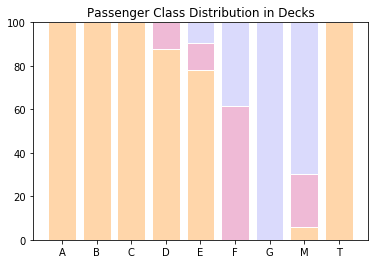

In [29]:
# Create percent stacked barplot
r = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T']
barWidth = 0.8
plt.bar(r, dPclass_1, color='#ffd6aa', edgecolor='white', width=barWidth)
plt.bar(r, dPclass_2, bottom=dPclass_1, color='#efbad6', edgecolor='white', width=barWidth)
plt.bar(r, dPclass_3, bottom=[i+j for i,j in zip(dPclass_1,dPclass_2)], color='#dadafc', edgecolor='white', width=barWidth)
plt.title('Passenger Class Distribution in Decks')

From the <Passenger Class Distribution in Decks> plot, we observed that:
    - All passengers on Deck A, B, C, and T were the first-class passengers
    - All passengers on Deck G were the third-class passengers
    - Deck D had 87% first-class passengers, and 13% second-class passengers
    - Deck E had 83% first-class passengers, 10% second-class passengers, and 7% third-class passengers
    - Deck F had 62% second-class passengers, 38% third-class passengers
    - Majority records have missing Deck value (as labeled 'M')

In [30]:
# Examine the survival rate by passenger classes in different decks
raw1.groupby(['Deck', 'Pclass'])['Survived'].mean()

Deck  Pclass
A     1         0.466667
B     1         0.744681
C     1         0.593220
D     1         0.758621
      2         0.750000
E     1         0.720000
      2         0.750000
      3         1.000000
F     2         0.875000
      3         0.200000
G     3         0.500000
M     1         0.475000
      2         0.440476
      3         0.235908
T     1         0.000000
Name: Survived, dtype: float64

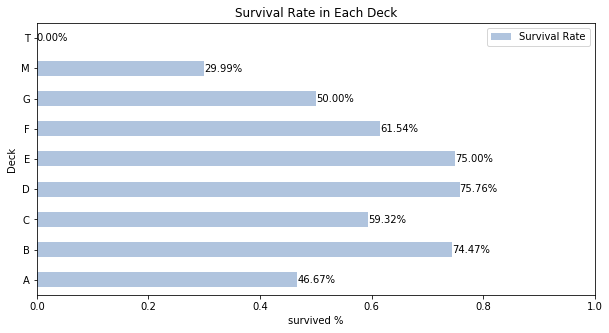

In [31]:
# Exaime & Plot the survival rate in different decks
df_raw1_Dsurvival = pd.DataFrame(raw1.groupby('Deck')['Survived'].mean()).rename(columns={'Survived':'Survival Rate'})
df_raw1_Dsurvival.reset_index(inplace=True)
df_raw1_Dsurvival.plot.barh(x='Deck', y='Survival Rate', color='lightsteelblue', figsize=(10,5))
plt.xlabel('survived %')
plt.xlim(0,1)
plt.title('Survival Rate in Each Deck')

for index, value in enumerate(df_raw1_Dsurvival['Survival Rate']):
    label = format(value,'.2%')
    plt.annotate(label, xy=(value, index-0.10), color='black')

plt.show()

From the survival rate plot, we observed that:
- 1st-class passengers on Deck A,B,C and T had a different survival rate. Since there was only 1 passenger on Deck T, I merged Deck T with Deck A
- Deck D and E had a similar passenger class distribution and survival rate. So I grouped D and E decks and labeled them as Deck DE

In [32]:
for dataset in data_cleaner:
    dataset['Deck'].replace('T','A', inplace=True)
    dataset['Deck'].replace(['D','E'], 'DE', inplace=True)

#### 2. Feature engineering- create and group new features
- Title & Ttitle_group: Mr, Mrs, Miss, Master
- FamilySize & FamilySize_group: alone, small, medium, large
- AgeBin
- FareBin

In [33]:
for dataset in data_cleaner:
    # Title: split from Name
    # (e.g. Braund, Mr. Owen Harris)
    dataset['Title'] = dataset['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    
    # FamilySize: the Person + Siblings/Spouses + Parents/Children
    dataset['FamilySize'] = 1 + dataset['SibSp'] + dataset['Parch']
    
    # Group Age into Age Bins using cut (value bins)
    # cut: bin values into discrete intervals
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 8)
    
    # Group Fare into Fare Bins using qcut (frequency bins)
    # qcut: quantile-based discretization function
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 10)

Text(0.5, 1.0, 'Fare Bins Distribution')

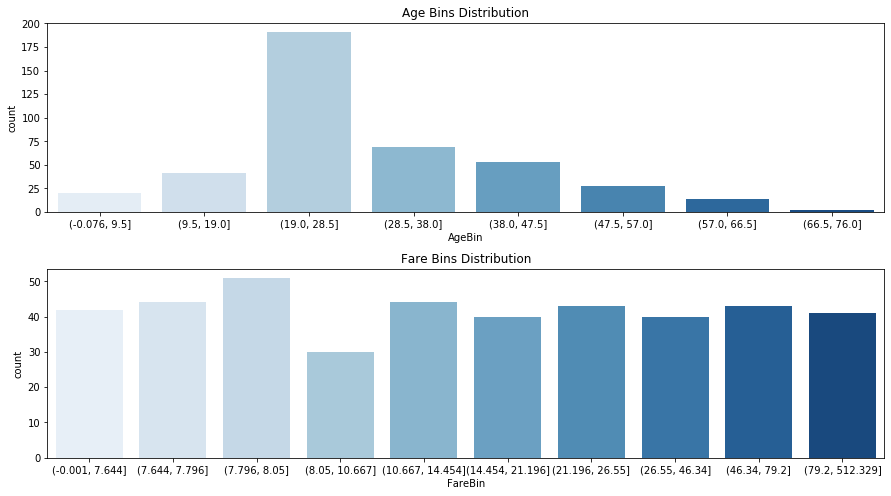

In [34]:
fig, ax = plt.subplots(2,1, figsize=(15,8))
fig.subplots_adjust(hspace=0.3)
sns.countplot(dataset['AgeBin'], ax=ax[0], palette='Blues').set_title('Age Bins Distribution')
sns.countplot(dataset['FareBin'], ax=ax[1], palette='Blues').set_title('Fare Bins Distribution')

In [35]:
print(raw1['Title'].unique())
print(validation['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [36]:
# Cleanup rare titles: combine into four categories (Mr. Mrs. Miss Master)
def replace_titles(x):
    title=x['Title']
    if title in ('Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col', 'Sir'):
        return 'Mr'
    elif title in ('Dona', 'the Countess', 'Mme', 'Lady'):
        return 'Mrs'
    elif title in ('Mlle', 'Ms'):
        return 'Miss'
    elif title == 'Dr':
        if x['Sex'] == 'Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

for dataset in data_cleaner:
    dataset['Title_group'] = dataset.apply(replace_titles, axis=1)

In [37]:
raw1['Title_group'].value_counts()

Mr        531
Miss      185
Mrs       135
Master     40
Name: Title_group, dtype: int64

In [38]:
# Group the family size: alone, small, medium, large
family_map = {1:'Alone', 2:'Small', 3:'Small', 4:'Medium', 5:'Medium', 6:'Medium', 7:'Large', 8:'Large', 11:'Large'}

for dataset in data_cleaner:
    dataset['FamilySize_group'] = dataset['FamilySize'].map(family_map)

In [39]:
dataset['FamilySize_group'].value_counts()

Alone     253
Small     131
Medium     24
Large      10
Name: FamilySize_group, dtype: int64

Text(0.5, 1.0, 'Survival Counts in Each Family Size Group')

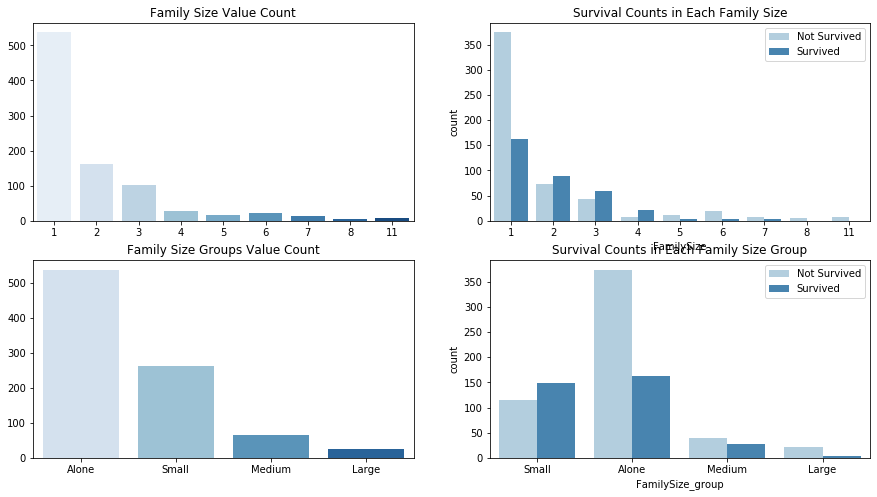

In [40]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15,8))

# Plot bar chart to show the distribution of family size
sns.barplot(x=raw1['FamilySize'].value_counts().index,
            y=raw1['FamilySize'].value_counts().values,
            ax=axs[0][0], palette='Blues')
axs[0][0].set_title('Family Size Value Count')

# Show survived-or-not in each family size
sns.countplot(x='FamilySize', hue='Survived', data=raw1,
             ax=axs[0][1], palette='Blues')
axs[0][1].legend(['Not Survived', 'Survived'], loc='upper right')
axs[0][1].set_title('Survival Counts in Each Family Size')

# Plot bar chart to show the distribution of family size groups
sns.barplot(x=raw1['FamilySize_group'].value_counts().index, 
            y=raw1['FamilySize_group'].value_counts().values, 
            ax=axs[1][0], palette='Blues')
axs[1][0].set_title('Family Size Groups Value Count')

# Show survived-or-not in each family size group
sns.countplot(x='FamilySize_group', hue='Survived', data=raw1, 
              ax=axs[1][1], palette='Blues')
axs[1][1].legend(['Not Survived', 'Survived'], loc='upper right')
axs[1][1].set_title('Survival Counts in Each Family Size Group')

### Exploratory Data Analysis Summary
- seaborn tutorial https://seaborn.pydata.org/generated/seaborn.countplot.html
- groupby tutorial https://www.marsja.se/python-pandas-groupby-tutorial-examples/

#### 1. Survival rate by each feature

In [41]:
raw1.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title,FamilySize,AgeBin,FareBin,Title_group,FamilySize_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,M,Mr,2,"(20.0, 30.0]","(-0.001, 7.55]",Mr,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs,2,"(30.0, 40.0]","(39.688, 77.958]",Mrs,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,M,Miss,1,"(20.0, 30.0]","(7.854, 8.05]",Miss,Alone


In [42]:
predictor = ['Pclass', 'Sex', 'Title_group', 'Age', 'AgeBin', 'FamilySize_group', 'Fare', 'FareBin', 'Embarked', 'Deck']
target = ['Survived']

In [43]:
# Overall Survival Rate
raw_survived = raw.loc[raw['Survived'] == 1, 'PassengerId'].count()
survival_rate =  raw_survived / raw['PassengerId'].count()
print("There were {} people in the raw dataset- {} of them survived. \nThe overall survival rate is {}".format(raw.shape[0], raw_survived, '%.2f'%survival_rate))

There were 891 people in the raw dataset- 342 of them survived. 
The overall survival rate is 0.38


In [44]:
predictor_cat = []
for x in predictor:
    if raw1[x].dtypes != 'float64':
        predictor_cat.append(x)

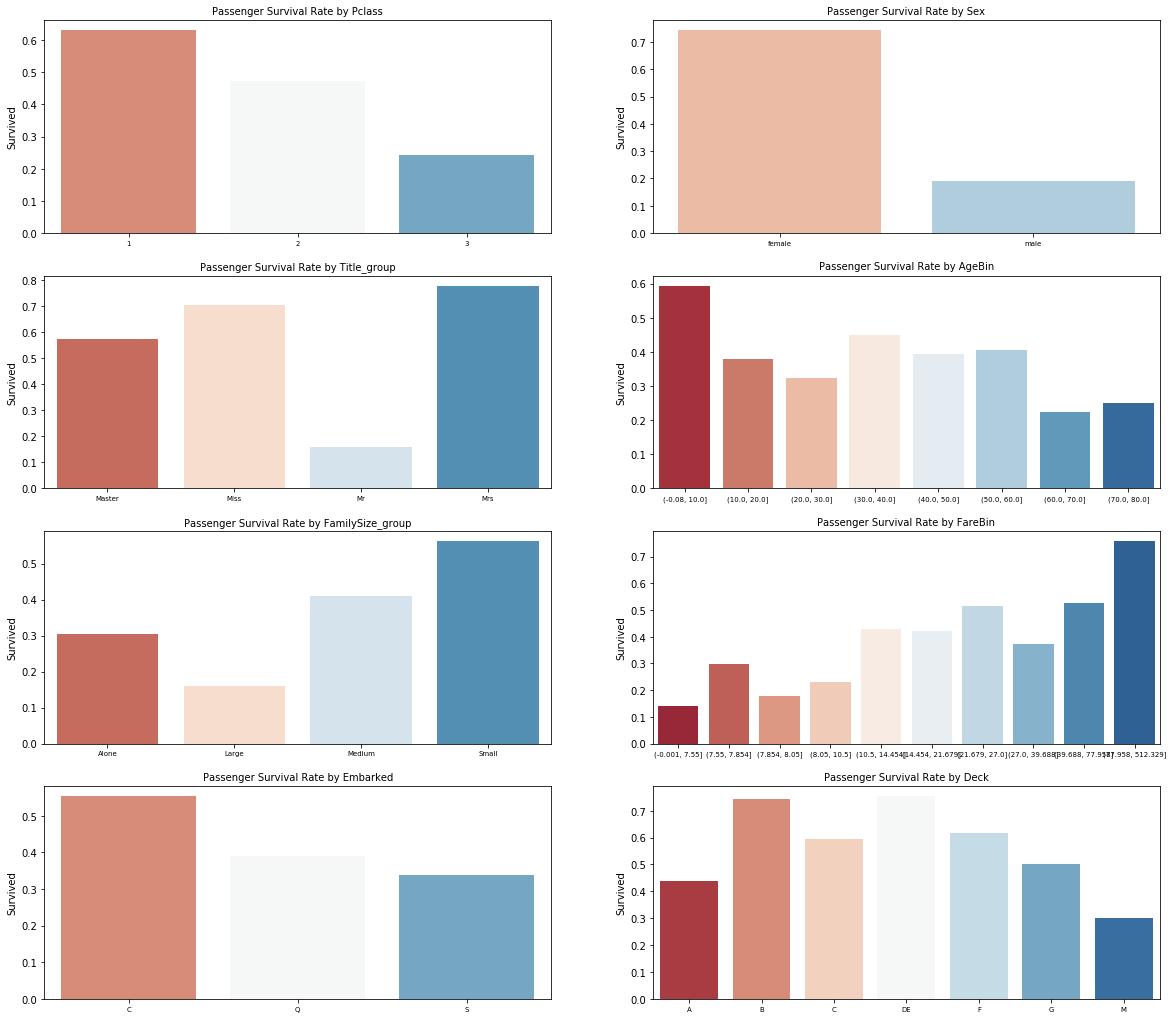

In [45]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20,18))

for x, i in zip(predictor_cat, range(len(predictor_cat))):
    i += 1
    ax1 = math.floor((i-1)/2)
    ax2 = (i-1) % 2
    survival_rate = raw1.groupby([x])[target[0]].mean()
    
    sns.barplot(x=survival_rate.index, y=survival_rate, ax=axs[ax1][ax2], palette='RdBu')
    axs[ax1][ax2].set_title("Passenger Survival Rate by {}".format(x), fontsize=10)
    axs[ax1][ax2].set_xticklabels(survival_rate.index, fontsize=7)
    axs[ax1][ax2].xaxis.label.set_visible(False)

In [46]:
for x in predictor:
    if raw1[x].dtypes !='float64':
        survival_rate = raw1[[x, target[0]]].groupby(x, as_index=False).mean()
        print("Survival Correlation by {} is {}".format(x, survival_rate))

Survival Correlation by Pclass is    Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
Survival Correlation by Sex is       Sex  Survived
0  female  0.742038
1    male  0.188908
Survival Correlation by Title_group is   Title_group  Survived
0      Master  0.575000
1        Miss  0.702703
2          Mr  0.158192
3         Mrs  0.777778
Survival Correlation by AgeBin is           AgeBin  Survived
0  (-0.08, 10.0]  0.593750
1   (10.0, 20.0]  0.379310
2   (20.0, 30.0]  0.322751
3   (30.0, 40.0]  0.448649
4   (40.0, 50.0]  0.392857
5   (50.0, 60.0]  0.404762
6   (60.0, 70.0]  0.222222
7   (70.0, 80.0]  0.250000
Survival Correlation by FamilySize_group is   FamilySize_group  Survived
0            Alone  0.303538
1            Large  0.160000
2           Medium  0.409091
3            Small  0.562738
Survival Correlation by FareBin is              FareBin  Survived
0     (-0.001, 7.55]  0.141304
1      (7.55, 7.854]  0.298851
2      (7.854, 8.05]  0.179245
3       (8.

##### Pclass (ordinal feature)
Observations:
- 24% passengers in Class 1, 21% in Class 2, and 55% in Class 3
- Among the surviors, 40% from Class 1, 25% from Class 2, and 35% from Class 3
- Among the deaths, 14% from Class 1, 18% from Class 2, and 68% from Class 3
- Passengers in Class 1 were more like to survive, while those in Class 3 were more likely to die. Passengers in Class 2 had a 50-50 chance to survive


Decision:
- There is an obvious difference between the survival rate and Pclass. We should add Pclass as a feature in the model training

##### Age
Observations:
- Most passsengers are in 15-40 age range
- Infants and kids (age<5) and the oldest passengers (age=80) had a high survival rate
- Many passengers between 15-30 years old did not survive

Decision:
- We should consider Age (or age bins) as a feature in the model training

##### Sex
Observations:
- There were 65% male and 35% female onboard
- Female passengers had a much higher suvival rate than males

Decision:
- We should add Sex as a feature in the model training

##### Family Size (including siblings, spouses, parents and children)
Observations:
- Most passsengers had a small family size (with no more than 2 family members onboard)
- More than half passengers were alone onboard
- Passengers with more than 8 family members did not survive
- For the passengers who traveled alone, there was about 50-50 chance of survival. However, for the passengers who traveled with other family members, there was a higher non-survival risk

Decision:
- We should consider FamilySize (or IsAlone) as a feature in the model training

##### Deck
Observations:
- There were 687 missing values, making up 77% of the observations
- Deck B,C,D,E had more survival than death
- Deck G had more death than survival

Decision:
- Considering a large amount of missing value, we may not consider Deck as a model feature

##### Embarkation
Observations:
- C = Cherbourg more death
- Q = Queenstown more death
- S = Southampton more survival

Decision:
- We should consider the port of embarkation as a feature in the model training

#### 2. Correlating multiple features
##### Pclass - Age

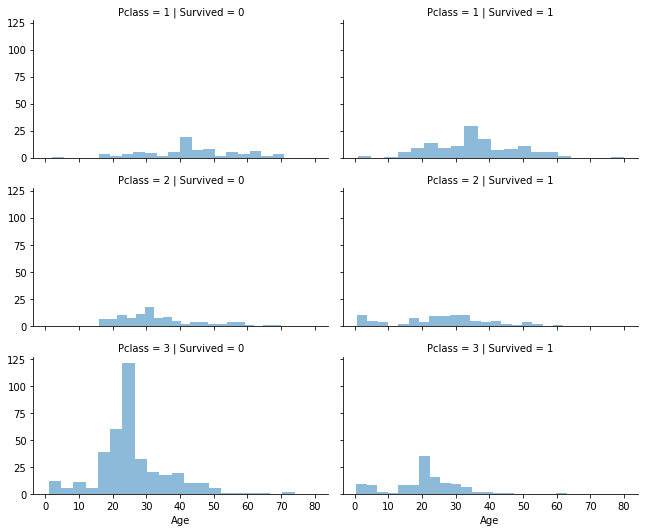

In [47]:
grid = sns.FacetGrid(raw1, col='Survived', row='Pclass', size=2.5, aspect=1.8)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

##### Pclass - Sex & Age

In [48]:
# Demographic group: children (age<=16), female adults, male adults, seniors (age>64)
# https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
raw1['demo'] = 0
for index, row in raw1.iterrows():
    if raw1['Age'][index] <= 16:
        raw1['demo'][index] = 'child'
    elif raw1['Age'][index] > 64:
        raw1['demo'][index] = 'senior'
    elif 16 < raw1['Age'][index] <= 64 and raw1['Sex'][index] == 'male':
        raw1['demo'][index] = 'male adult'
    else:
        raw1['demo'][index] = 'female adult'

(0, 100)

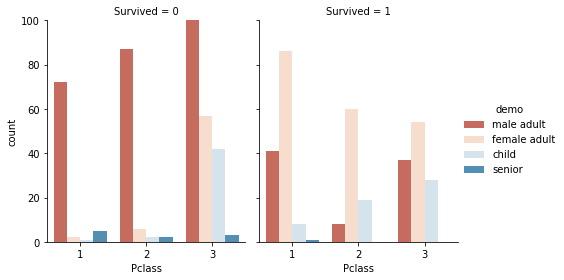

In [49]:
sns.catplot(x='Pclass', hue='demo', col='Survived', data=raw1,
           kind='count', height=4, aspect=0.8, palette='RdBu')
plt.ylim(0, 100)

##### Fare - Embarkation - Pclass - Demographic (Sex & Gender) 

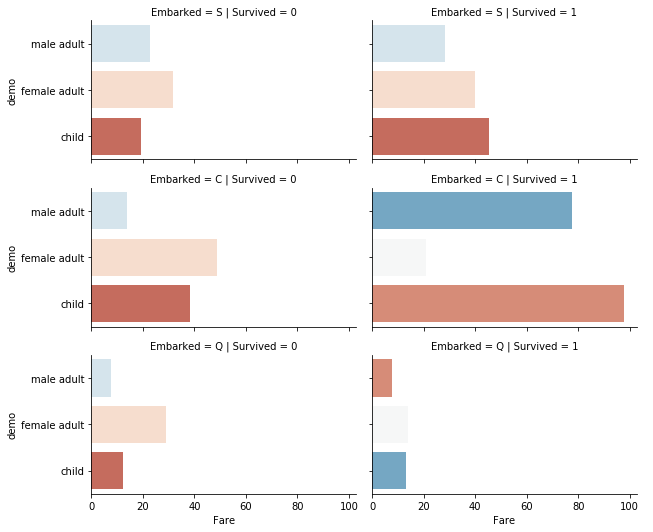

In [50]:
grid = sns.FacetGrid(raw1, row='Embarked', col='Survived', size=2.5, aspect=1.8)
grid.map(sns.barplot, 'Fare', 'demo', palette='RdBu', ci=None)
grid.add_legend()

### Modeling

#### 1. Preparing Train / Test Datasets

In [51]:
raw1.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title,FamilySize,AgeBin,FareBin,Title_group,FamilySize_group,demo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,M,Mr,2,"(20.0, 30.0]","(-0.001, 7.55]",Mr,Small,male adult


In [52]:
df = raw1.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Title', 'AgeBin', 'FareBin', 'FamilySize', 'demo'], axis=1)
df.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Title_group,FamilySize_group
0,0,3,male,22.0,7.2500,S,M,Mr,Small
1,1,1,female,38.0,71.2833,C,C,Mrs,Small
2,1,3,female,26.0,7.9250,S,M,Miss,Alone


In [53]:
# Convert dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head(3)

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,...,Deck_G,Deck_M,Title_group_Master,Title_group_Miss,Title_group_Mr,Title_group_Mrs,FamilySize_group_Alone,FamilySize_group_Large,FamilySize_group_Medium,FamilySize_group_Small
0,0,3,22.0,7.2500,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
1,1,1,38.0,71.2833,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1,3,26.0,7.9250,1,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0


In [54]:
X_dummies = ['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_DE', 'Deck_F', 'Deck_G', 'Deck_M', 'Title_group_Master',
       'Title_group_Miss', 'Title_group_Mr', 'Title_group_Mrs',
       'FamilySize_group_Alone', 'FamilySize_group_Large',
       'FamilySize_group_Medium', 'FamilySize_group_Small']
y = ['Survived']

In [55]:
# Split training and testing data
from sklearn.model_selection import train_test_split
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_dummies[X_dummies], df_dummies[y], random_state=0)
print("The original dataset: {}. \nThe training set: {}. \nThe testing set: {}.".format(df.shape, df_X_train.shape, df_X_test.shape))

The original dataset: (891, 9). 
The training set: (668, 23). 
The testing set: (223, 23).


#### 2. Machine Learning Algorithms Initialization and Selection

scikit-learn model guidance: https://scikit-learn.org/stable/user_guide.html

In [56]:
# Supervised Learning Algorithms

# 1. Generalized Linear Models
from sklearn.linear_model import LogisticRegression # - Logistic Regression
lr = LogisticRegression(C=0.01, solver='liblinear')

from sklearn.linear_model import RidgeCV # - Ridge Classification
ridge = RidgeCV()

# 2. Classification
from sklearn.tree import DecisionTreeClassifier # - Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5)

from sklearn import neighbors # - KNN
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

from sklearn.svm import SVC # - SVM
svc = SVC(kernel='linear', probability=True)

from sklearn.naive_bayes import GaussianNB # - Naive Bayes
gnb = GaussianNB()

# 3. Gaussian Process
from sklearn import gaussian_process
gp = gaussian_process.GaussianProcessClassifier()

# 4. Ensemble Methods
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=100, base_estimator=None, learning_rate=1, random_state=1) # - Boosting

from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier() # - Bagging

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
forest = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0) # - Random Forest
extraTree = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0) # - Extra Trees



# Cross Validation
from sklearn.model_selection import cross_validate

In [57]:
MLA = [lr, ridge, dtree, knn, svc, gnb, gp, adaboost, bagging, forest, extraTree]

In [58]:
# create a table to compare algorithms' performance
MLA_columns = ['MLA Name', 'MLA Parameter', 'Test Accuracy Score', 'Processing Time']
MLA_table = pd.DataFrame(columns=MLA_columns)

# create a table of prediction results for the test dataset
MLA_predict = df_y_test

In [59]:
MLA_row = 0

for model in MLA:
    # get the name and parameters of the model
    MLA_name = model.__class__.__name__
    MLA_table.loc[MLA_row, 'MLA Name'] = MLA_name
    MLA_table.loc[MLA_row, 'MLA Parameter'] = str(model.get_params())
    
    # train the model
    model.fit(df_X_train, df_y_train)
    
    # make prediction
    MLA_predict[MLA_name] = model.predict(df_X_test)
    
    # use cross validation to score model
    cv_results = cross_validate(model, df_dummies[X_dummies], df_dummies[y], cv=10)
    MLA_table.loc[MLA_row, 'Test Accuracy Score'] = cv_results['test_score'].mean()
    MLA_table.loc[MLA_row, 'Processing Time'] = cv_results['fit_time'].mean()
    
    MLA_row += 1

In [60]:
MLA_table.sort_values(by=['Test Accuracy Score'], ascending=False, inplace=True)
MLA_table

,MLA Name,MLA Parameter,Test Accuracy Score,Processing Time
7,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.813716,0.15077
2,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'entropy',...",0.810458,0.00548742
8,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.809298,0.0245546
9,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.807037,0.018405
4,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.790183,46.8724
10,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.77901,0.0162242
0,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",0.772343,0.00458143
5,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.772293,0.00273981
6,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.74429,0.3043
3,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.726349,0.00482759


In [61]:
MLA_table['Test Accuracy Score'] = [float(score) for score in MLA_table['Test Accuracy Score']]

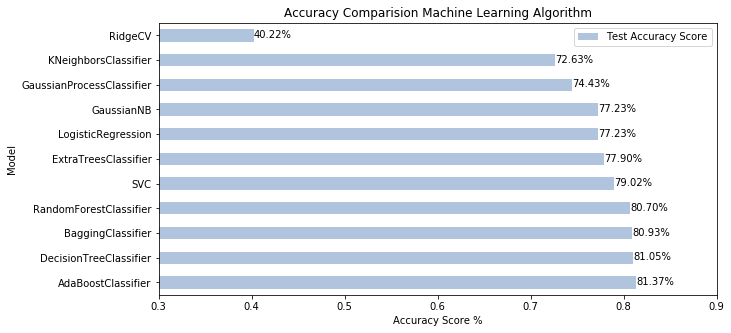

In [62]:
MLA_table.plot.barh(x='MLA Name', y='Test Accuracy Score', color='lightsteelblue', figsize=(10,5))
plt.xlabel('Accuracy Score %')
plt.xlim(0.3,0.9)
plt.ylabel('Model')
plt.title('Accuracy Comparision Machine Learning Algorithm')

for index, value in enumerate(MLA_table['Test Accuracy Score']):
    label = format(value,'.2%')
    plt.annotate(label, xy=(value, index-0.10), color='black')

plt.show()

We select the models that have a test accuracy score higher than 80%
- Bagging
- Boosting (AdaBoost)
- Decision Tree
- Random Forest

#### 3. Examine the Models
###### results and model performances

In [63]:
MLA_predict[['Survived', 'AdaBoostClassifier', 'BaggingClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier']].head()

,Survived,AdaBoostClassifier,BaggingClassifier,DecisionTreeClassifier,RandomForestClassifier
495,0,0,0,0,0
648,0,0,0,0,0
278,0,0,0,0,0
31,1,1,1,1,1
255,1,1,0,0,1


In [64]:
# Import model evaluation libraries
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [65]:
# Define confusion matrix plotting
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Default by non-normalized confusion matrix.
    Normalization can be applied by setting 'normalize=True'
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("normalized confusion matrix")
    else:
        print("confusion matrix without normalization")
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes, rotation=90)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

##### 3.1 Model - Bagging

In [66]:
# Evaluate the Bagging model- accuracy score
metrics.accuracy_score(MLA_predict['Survived'], MLA_predict['BaggingClassifier'])

0.8116591928251121

confusion matrix without normalization
[[ 57  27]
 [ 15 124]]


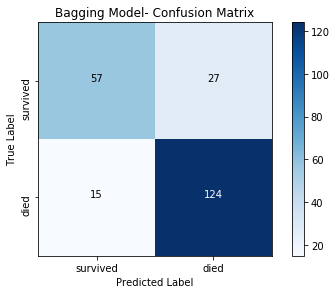

In [67]:
# Evaluate the Bagging model- confusion matrix
cnf_matrix = confusion_matrix(MLA_predict['Survived'], MLA_predict['BaggingClassifier'], labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['survived', 'died'], normalize=False, title='Bagging Model- Confusion Matrix')

##### 3.2 Model - AdaBoost

In [68]:
# Evaluate the AdaBoost model- accuracy score
metrics.accuracy_score(MLA_predict['Survived'], MLA_predict['AdaBoostClassifier'])

0.8026905829596412

confusion matrix without normalization
[[ 64  20]
 [ 24 115]]


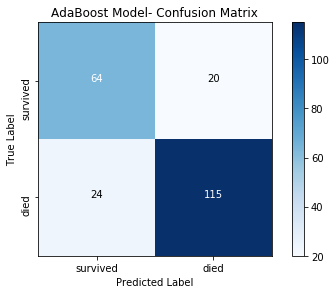

In [69]:
# Evaluate the AdaBoost model- confusion matrix
cnf_matrix = confusion_matrix(MLA_predict['Survived'], MLA_predict['AdaBoostClassifier'], labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['survived', 'died'], normalize=False, title='AdaBoost Model- Confusion Matrix')

##### 3.3 Model - Decision Tree

In [70]:
# Visualize the tree
from sklearn import tree
from IPython.display import Image

#! pip install graphviz
#! conda install graphviz --yes
import graphviz

#! pip install pydotplus
import pydotplus

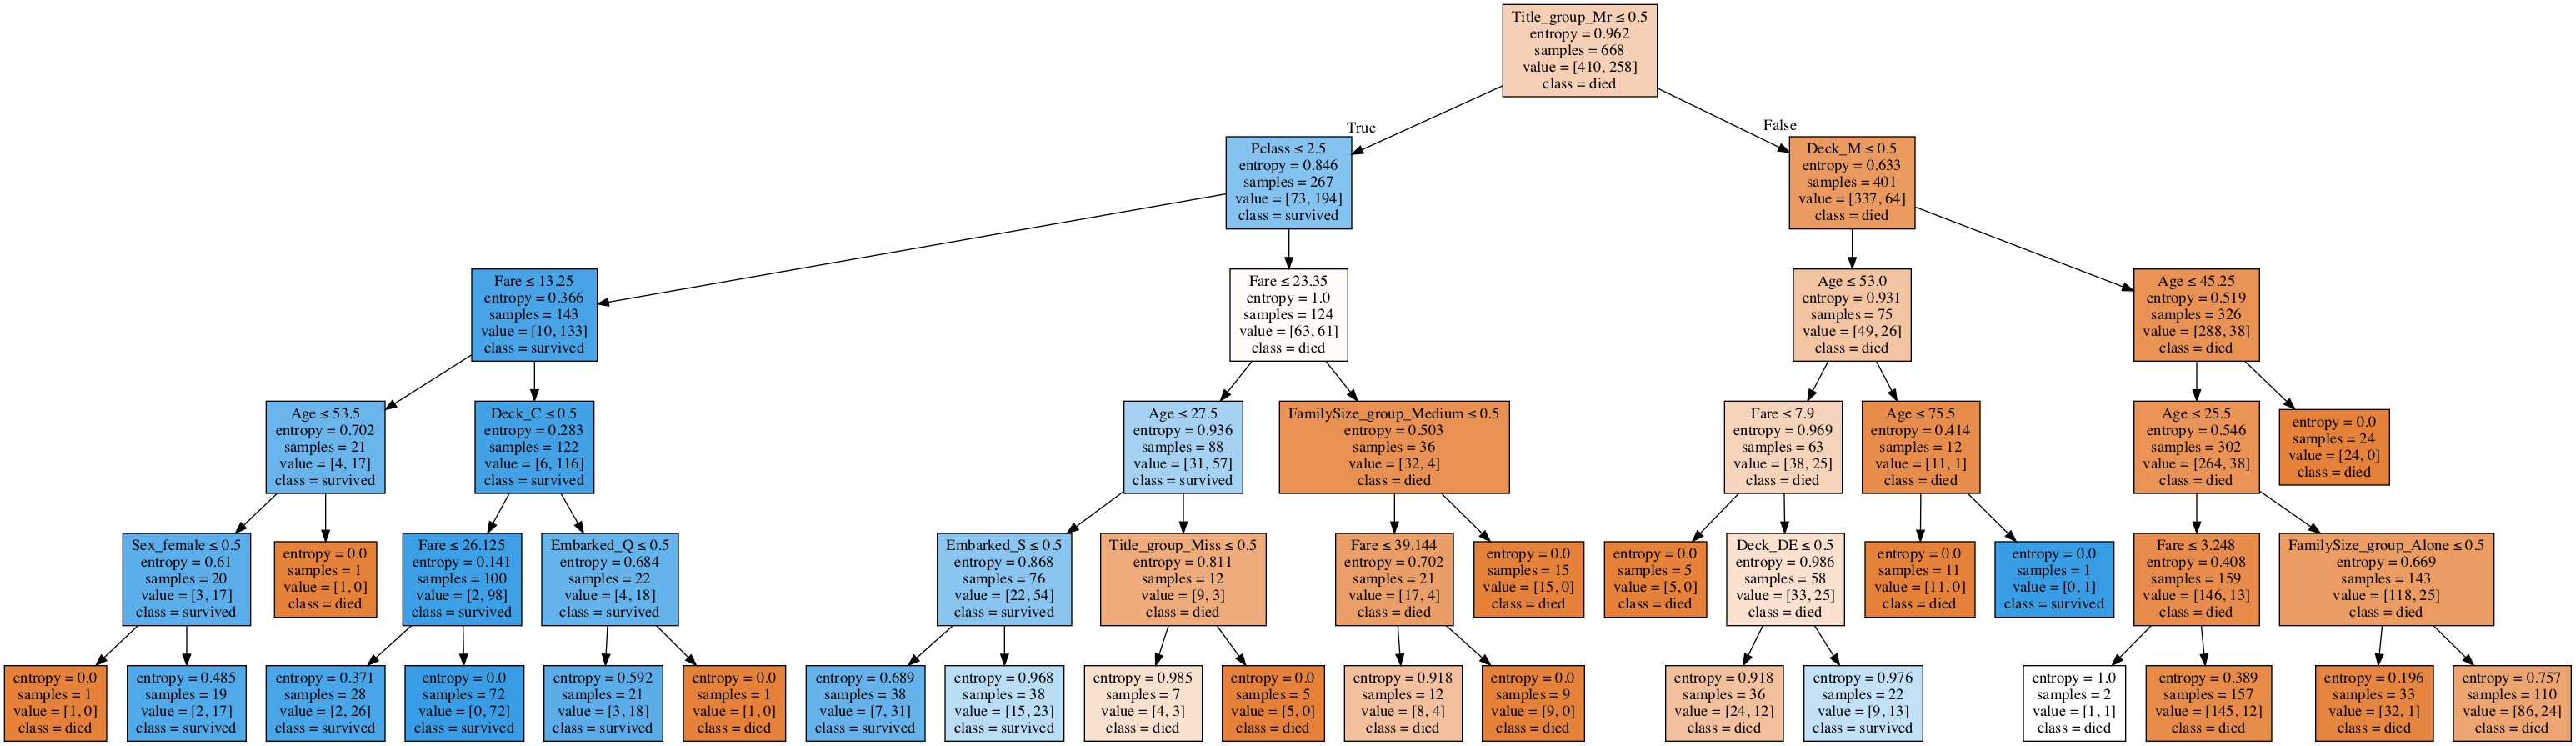

In [71]:
# create dot data
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=X_dummies, class_names=['died','survived'],
                                filled=True,special_characters=True,rotate=False)

# draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# show image
Image(graph.create_png())

In [72]:
# Evaluate the decision tree model- accuracy score
metrics.accuracy_score(MLA_predict['Survived'], MLA_predict['DecisionTreeClassifier'])

0.8251121076233184

confusion matrix without normalization
[[ 61  23]
 [ 16 123]]


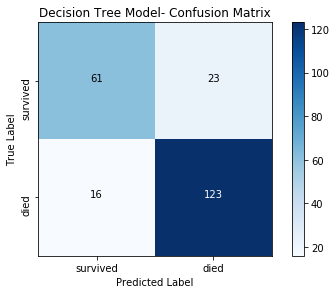

In [73]:
# Evaluate the decision tree model- confusion matrix
cnf_matrix = confusion_matrix(MLA_predict['Survived'], MLA_predict['DecisionTreeClassifier'], labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['survived', 'died'], normalize=False, title='Decision Tree Model- Confusion Matrix')

##### 3.4 Model - Random Forest

In [74]:
# Evaluate the random forest model- accuracy score
metrics.accuracy_score(MLA_predict['Survived'], MLA_predict['RandomForestClassifier'])

0.8071748878923767

confusion matrix without normalization
[[ 60  24]
 [ 19 120]]


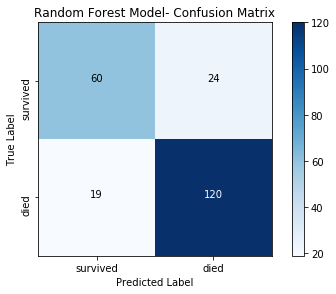

In [75]:
# Evaluate the random forest model- confusion matrix
cnf_matrix = confusion_matrix(MLA_predict['Survived'], MLA_predict['RandomForestClassifier'], labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['survived', 'died'], normalize=False, title='Random Forest Model- Confusion Matrix')

### Prediction
#### 1. Preparing the dataset for prediction

In [76]:
validation.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title,FamilySize,AgeBin,FareBin,Title_group,FamilySize_group
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,M,Mr,1,"(28.5, 38.0]","(7.796, 8.05]",Mr,Alone


In [77]:
# dataset for prediction
prediction = validation.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Title', 'AgeBin', 'FareBin', 'FamilySize'], axis=1)
prediction = pd.get_dummies(prediction)
prediction.head(3)

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,...,Deck_G,Deck_M,Title_group_Master,Title_group_Miss,Title_group_Mr,Title_group_Mrs,FamilySize_group_Alone,FamilySize_group_Large,FamilySize_group_Medium,FamilySize_group_Small
0,3,34.5,7.8292,0,1,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
1,3,47.0,7.0000,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
2,2,62.0,9.6875,0,1,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0


#### 2. Prediction with Bagging

In [78]:
# model: bagging
bagging_predict = bagging.predict(prediction)

In [79]:
result_bagging = validation[['PassengerId']]
result_bagging['Survived'] = bagging_predict
result_bagging.head(3)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0


In [80]:
result_bagging.to_csv('result_bagging.csv', header=True, index=False)

#### 3. Prediction with Decision Tree

In [81]:
# model: dtree
dtree_predict = dtree.predict(prediction)

In [82]:
result_dtree = validation[['PassengerId']]
result_dtree['Survived'] = dtree_predict
result_dtree.head(3)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0


In [83]:
result_dtree.to_csv('result_dtree.csv', header=True, index=False)